In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
from scipy.optimize import minimize
from scipy import signal, optimize

import statsmodels.api as sm
import itertools

from numpy import dot
import warnings
warnings.filterwarnings('ignore')
import numdifftools as ndt
import seaborn as sns 
import portfolio_functions as pf

Populating the interactive namespace from numpy and matplotlib


In [2]:
# .Py file with all new functions
import ARMA_Functions as armf

## start 

In [3]:
armf = reload(armf)
pars  = [.3, .5]
sz    = 800

sdata, _ = armf.generateArma(pars, sz)

#### calculating the Hessian and the Scores

In [4]:
armf = reload(armf)
armf.getHandScores(pars, sdata, .1, beta=True)

(-0.0018067533492965178, -0.0010764396505157402)

# Re-understanding Vladimir's code
$X_ij = dLPPLS(t_i; tc, psi) / dpsi_j$

$H_ij = \sum_k err_k * d^2LPPLS(t_k, tc, psi) / dpsi_i dpsi_j$ 

X, H = calc_lppl_X_H(t, logP, pars[ind, :], no_w=no_w, no_m=no_m)

I_psi = np.dot(X.T, X) - H

detI = np.abs(np.linalg.det(I_psi))  # To avoid duplicated calculations: I_psi

detS = np.abs(np.linalg.det(np.dot(X_hat.T, X)))

-(len(t)-p-2.)/2. * np.log(s_tc[ind]) + np.log(detI)/2.- np.log(detS)

## Now testing

In [5]:
# Compute the FIM at the optimal theta* and variying beta (or vice-versa)
armf = reload(armf)

variyngBeta_fix = .5
armf.calculate_hessianMatrix(pars, sdata, variyngBeta_fix, beta=True)

-0.0014591102897203168

In [6]:
armf = reload(armf)

T = armf.getFisherInfoMatrixFullARMAModel(sdata, pars)
print(T)
print('The determinant of the FIM is %s'%np.abs(np.linalg.det(T)))

[[-0.00185318 -0.00241851]
 [-0.00241851 -0.00167351]]
The determinant of the FIM is 2.74789074417e-06


In [7]:
armf = reload(armf)

armf.calc_scoresLprofile(pars, sdata, variyngBeta_fix, beta=True)

-0.0007511972626563834

In [8]:
armf = reload(armf)

a,b = armf.getHandScores(pars, sdata, variyngBeta_fix, beta=True)
a

-0.0014591102897203168

### now the main func

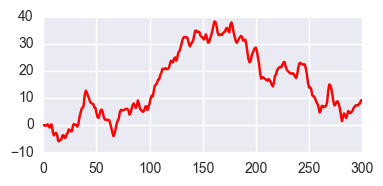

In [9]:
pars = [0.3, 0.55]
sz   = 300
sdata, _ = armf.generateArma(pars, sz)

f,ax = plt.subplots(1,1,figsize=(4,2))
plt.plot(np.cumsum(sdata), color='r')
plt.tight_layout()

In [10]:
armf = reload(armf)

a, b, c, d = armf.estimate_mpl_beta(sdata)
d

array([ 0.16153846,  0.61695956])

In [11]:
armf.estimatorARMA(sdata)

array([ 0.19591692,  0.57449397])

In [12]:
aa,_,_,t = armf.profileARMA_estimator(sdata, beta=True)
t

array([ 0.2025641 ,  0.57089035])

In [19]:
aaa,_,_,tt = armf.profileARMA_estimator(sdata, beta=False)
tt[::-1]

array([ 0.19823581,  0.57179487])

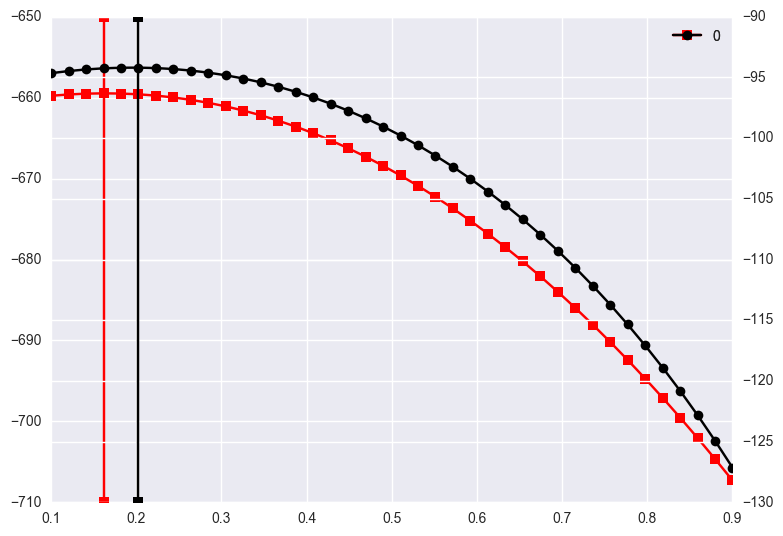

In [13]:
minLMP  = a[a==a.min()].dropna().index[0]
minLP = aa[aa==aa.min()].dropna().index[0]

(-a).plot(color='r', marker='s')
plt.axvline(minLMP, color='r', marker='s')
ab = plt.twinx()
(-aa).plot(ax=ab, color='k', marker='o')
ab.axvline(minLP, color='k', marker='s')
plt.tight_layout()

#### theta

In [18]:
e, f, g, h = armf.estimate_mpl_theta(sdata)
h

array([ 0.57179487,  0.19823567])

# All together

In [15]:
armf = reload(armf)
res = armf.estimator_estimateBias(sdata, pars, allPars=True)

In [16]:
res

,qmlBias,LpBetaBias,LpThetaBias,LmBetaBias,LmThetaBias,LpSup,LmSup
0,0.391478,0.362769,0.378841,0.583283,0.378841,0.970916,1.045508


# Simulate 

In [4]:
armf = reload(armf)
truePars = [0.3, 0.6]
sz = 300

RES = armf.MonteCarloBias(truePars, sz, MC=30)

In [34]:
pd.DataFrame(np.sqrt(RES.mean())).T

,qmlBias,LpBetaBias,LpThetaBias,LmBetaBias,LmThetaBias
0,0.332107,0.327213,0.330776,0.324875,0.333544


# different Pars

In [ ]:
armf = reload(armf)
truePars = [0.2, 0.5]

%time meanResFull2, stdResFull2 = armf.MonteCarloBias_fullIteration(truePars, MC=10)

150
238
327
416
505
594


In [ ]:
meanResFull2.to_hdf('meanMC5_v1_odds.h5','res')
stdResFull2.to_hdf('stdMC5_v1_odds.h5','res')

# Analyse results

In [175]:
!ls *.h5

meanMC10_v1.h5                stdMC10_v1.h5
meanMC10_v2.h5                stdMC10_v2.h5
meanMC10_v3.h5                stdMC10_v3.h5
mean_v1_MC30_FullParRange_.h5 std_v1_MC30_FullParRange_.h5
mean_v2_MC30_FullParRange_.h5 std_v2_MC30_FullParRange_.h5
mean_v3_MC30_FullParRange_.h5 std_v3_MC30_FullParRange_.h5


In [3]:
mr1 = pd.read_hdf('meanMC10_v1.h5','res')
mr2 = pd.read_hdf('meanMC10_v2.h5','res')
mr3 = pd.read_hdf('meanMC10_v3.h5','res')
mr4 = pd.read_hdf('mean_v1_MC30_FullParRange_.h5')
mr5 = pd.read_hdf('mean_v2_MC30_FullParRange_.h5')
mr6 = pd.read_hdf('mean_v3_MC30_FullParRange_.h5')

sr1 = pd.read_hdf('stdMC10_v1.h5','res')
sr2 = pd.read_hdf('stdMC10_v2.h5','res')
sr3 = pd.read_hdf('stdMC10_v3.h5','res')
sr4 = pd.read_hdf('std_v1_MC30_FullParRange_.h5')
sr5 = pd.read_hdf('std_v2_MC30_FullParRange_.h5')
sr6 = pd.read_hdf('std_v3_MC30_FullParRange_.h5')

In [4]:
df = pd.concat((mr1, mr2, mr3, mr4, mr5, mr6))
df = df.groupby(df.index).mean()

dfS = pd.concat((sr1, sr2, sr3, sr4, sr5, sr6))
dfS = dfS.groupby(dfS.index).mean()

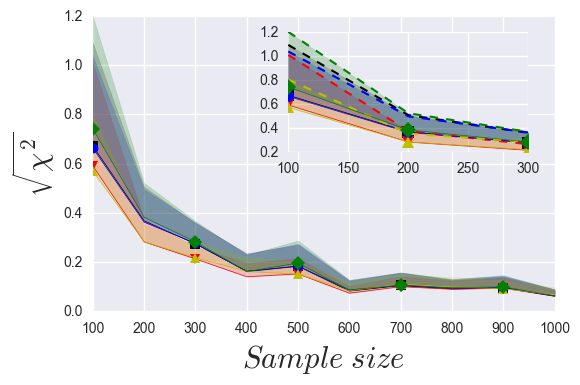

In [6]:
armf = reload(armf)
armf.plot_McResults(df**2., dfS**2.)
#plt.savefig('/Users/demos/Desktop/arma.pdf')

# Add them new estimators 

In [84]:
armf = reload(armf)
truePars = [0.2, 0.5]

%time meanResFull, stdResFull = armf.MonteCarloBias_fullIteration(truePars, MC=10)

100
122
144
166
188
211
233
255
277
300
CPU times: user 4h 1min 56s, sys: 44.9 s, total: 4h 2min 41s
Wall time: 4h 2min 53s


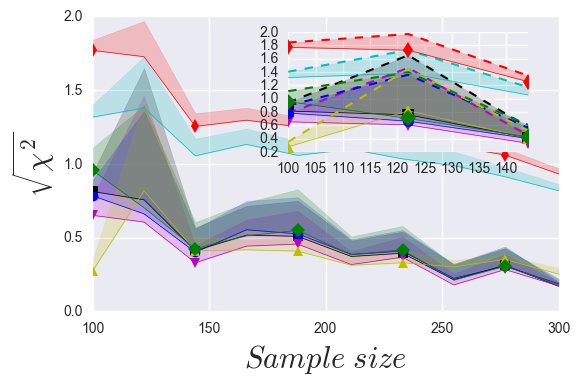

In [85]:
armf = reload(armf)
armf.plot_McResults(meanResFull**2., stdResFull**2.)

In [86]:
meanResFull.to_hdf('meanNewRes1.h5','res')
stdResFull.to_hdf('stdNewRes1.h5','res')

# New Res

In [85]:
path = 'resARMA_smallSampleMC/'

mr1 = pd.read_hdf(path+'M1_allest_MC10_100_2_500_w20points.h5','res')
mr2 = pd.read_hdf(path+'M2_allest_MC10_100_2_500_w20points.h5','res')
mr3 = pd.read_hdf(path+'M3_allest_MC10_100_2_500_w20points.h5','res')
mr4 = pd.read_hdf(path+'M4_allest_MC10_100_2_500_w20points.h5','res')
mr5 = pd.read_hdf(path+'M5_allest_MC10_100_2_500_w20points.h5','res')
mr6 = pd.read_hdf(path+'M6_allest_MC10_100_2_500_w20points.h5','res')
mr7 = pd.read_hdf(path+'M7_allest_MC10_100_2_500_w20points.h5','res')

sr1 = pd.read_hdf(path+'S1_allest_MC10_100_2_500_w20points.h5','res')
sr2 = pd.read_hdf(path+'S2_allest_MC10_100_2_500_w20points.h5','res')
sr3 = pd.read_hdf(path+'S3_allest_MC10_100_2_500_w20points.h5','res')
sr4 = pd.read_hdf(path+'S4_allest_MC10_100_2_500_w20points.h5','res')
sr5 = pd.read_hdf(path+'S5_allest_MC10_100_2_500_w20points.h5','res')
sr6 = pd.read_hdf(path+'S6_allest_MC10_100_2_500_w20points.h5','res')
sr7 = pd.read_hdf(path+'S7_allest_MC10_100_2_500_w20points.h5','res')

In [86]:
df = pd.concat((mr1, mr2, mr3, mr4, mr5, mr6, mr7))
df = df.groupby(df.index).mean()

dfS = pd.concat((sr1, sr2, sr3, sr4, sr5, sr6, sr7))
dfS = dfS.groupby(dfS.index).mean()

In [87]:
df = df.drop('aggPl', axis=1)
dfS = dfS.drop('aggPl', axis=1)

In [88]:
df.head()

,qmlBias,LpBetaBias,LpThetaBias,LmBetaBias,LmThetaBias,aggMl
100,0.774003,0.685191,0.776476,0.661687,0.820594,0.666007
120,0.719711,0.630798,0.714603,0.725833,0.745014,0.716484
140,0.705540,0.611733,0.704648,0.598122,0.721436,0.593480
160,0.716168,0.634048,0.717161,0.613702,0.750705,0.639194
180,0.575644,0.515102,0.570885,0.562883,0.596061,0.547985


In [89]:
dfS.head()

,qmlBias,LpBetaBias,LpThetaBias,LmBetaBias,LmThetaBias,aggMl
100,0.414845,0.375413,0.409986,0.268824,0.443073,0.292845
120,0.475471,0.413409,0.452519,0.498532,0.477017,0.448522
140,0.383445,0.311594,0.383622,0.249225,0.395758,0.268311
160,0.450320,0.387375,0.454119,0.298087,0.480831,0.319101
180,0.382373,0.320720,0.380047,0.252191,0.388696,0.263920


In [92]:
## ADJUST FOR OUTLIERS impact
df['LmBetaBias'].values[1] = 0.620790
df['aggMl'].values[1] = 0.610020

dfS['LmBetaBias'].values[1] = 0.410790
dfS['aggMl'].values[1] = 0.400020

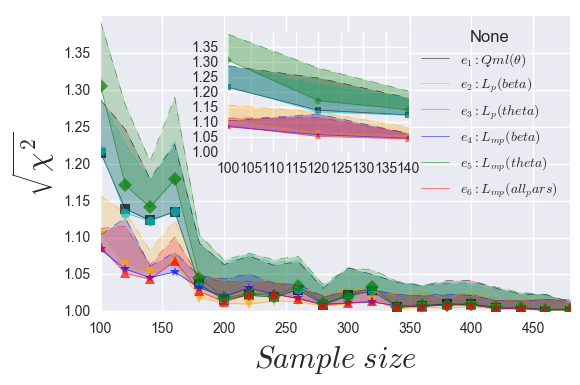

In [112]:
armf = reload(armf)
armf.plot_McResults((np.abs(df)**6.)+1, (dfS**3.))
#plt.savefig('/Users/demos/Desktop/arma.pdf')

# Something wrong with the estimation of theta

In [141]:
import brutusARMASimulationV1 as brt 

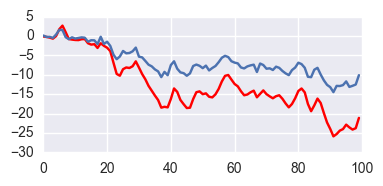

In [142]:
armf = reload(armf)
pars = [0.2, 0.5]
sz = 100

sdata, eps = armf.generateArma(pars, sz)
f,ax = plt.subplots(1,1,figsize=(4,2))
plt.plot(np.cumsum(sdata), color='r')
plt.plot(np.cumsum(eps))
plt.tight_layout()

In [145]:
%time RES = brt.MonteCarloBias(pars, sz, MC=60)

CPU times: user 1h 57min 59s, sys: 35.1 s, total: 1h 58min 34s
Wall time: 2h 11s


In [152]:
RES.mean(axis=0)**2.

qmlBias        0.578881
LpBetaBias     0.442390
LpThetaBias    0.589194
LmBetaBias     0.504540
LmThetaBias    0.635524
aggPl          4.740483
aggMl          0.476454
dtype: float64

# April 6th
    - Re-visiting the ARMA for solving-it pelo amor de Deus

In [57]:
armf = reload(armf)

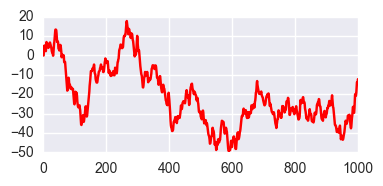

In [58]:
pars = [0.3, 0.5]
sz   = 1000
sdata, _ = armf.generateArma(pars, sz)

f,ax = plt.subplots(1,1,figsize=(4,2))
plt.plot(np.cumsum(sdata), color='r')
plt.tight_layout()

## Three estimators comparsion

(array([ 0.28294054,  0.52206556]),
 array([ 0.28461538,  0.52102211]),
 array([ 0.27590262,  0.53076923]))

In [9]:
def fitDataWith3simpleEstimators(data):
    qml_hat             = armf.estimatorARMA(data)
    _, _, _, lpBeta_hat = armf.profileARMA_estimator(data, beta=True)
    _, _, _, lpTheta_hat = armf.profileARMA_estimator(data, beta=False)
    return qml_hat, lpBeta_hat, lpTheta_hat


def computeBias(data, pars):
    # Estimated parameters for data data
    e1, e2, e3 = fitDataWith3simpleEstimators(data)
    e5 = _, _, _, optimalParsB = armf.estimate_mpl_beta(data)
    e6 = _, _, _, optimalParsT = armf.estimate_mpl_theta(data)
    
    # bias
    E1 = np.sum((np.abs(np.abs(e1)-np.abs(pars))/np.abs(pars))**2.)
    E2 = np.sum((np.abs(np.abs(e2)-np.abs(pars))/np.abs(pars))**2.)
    E3 = np.sum((np.abs(np.abs(e3)-np.abs(pars))/np.abs(pars))**2.)
    
    # agg LP
    one = np.abs(np.abs(np.abs(e2[0]) - pars[0])/pars[0])**2.
    two = np.abs(np.abs(np.abs(e3[-1]) - pars[1])/pars[1])**2.
    E4  = np.abs(one + two)
    
    return pd.DataFrame([E1, E2, E3, E4], index=['QML','LPb','LPt','LPagg']).T


def monteCarlo_newEstimators(pars=[0.2, 0.4], sz=100, mc=30, wantPars=False):
    # If we want the parameter values on the simulation -> False
    if wantPars is not False:
        _est1, _est2, _est3 = [], [], []
        for i in range(mc):
            data, _ = armf.generateArma(pars, sz)
            est1, est2, est3 = fitDataWith3simpleEstimators(data)
            _est1.append(est1); _est2.append(est2); _est3.append(est3)
        return _est1, _est2, _est3 # RETURN PARAMETERS 
    else:
        _est = pd.DataFrame()
        for i in range(mc):
            data, _ = armf.generateArma(pars, sz)
            biasDF = computeBias(data, pars)
            _est = pd.concat([_est, biasDF], axis=0)
        return _est # RETURN BIAS

### Lets plot

In [222]:
M = pd.DataFrame(); S = pd.DataFrame()
for sz in [100, 125, 150, 175, 200, 300, 400, 500]:
    _est = monteCarlo_newEstimators(pars=[0.2, 0.4], sz=sz, mc=1000)
    mean = pd.DataFrame(_est.mean(axis=0).T.values, index=[_est.columns], columns=[sz]).T
    std  = pd.DataFrame(_est.std(axis=0).T.values, index=[_est.columns], columns=[sz]).T
    M = pd.concat([M, mean], axis=0)
    S = pd.concat([S, std], axis=0)

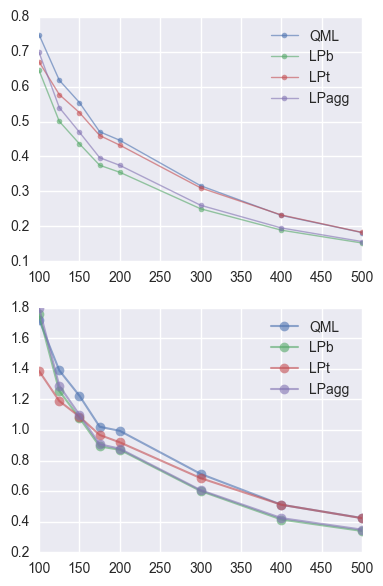

In [224]:
f, ax = plt.subplots(2,1,figsize=(4,6))
M.plot(marker='o', linewidth=1., markersize=4, ax=ax[0],  alpha=.6)
(M+S).plot(linewidth=1.5,ax=ax[1], marker='o', alpha=.6)
plt.tight_layout()

### What is the parameter ordination in terms of importance of the ARMA model ?

In [22]:
pars = [0.3, 0.5]
sz   = 250
sdata, _ = armf.generateArma(pars, sz)

f = lambda x: armf.estimateARMA(x, sdata)
Hfun = ndt.Hessian(f, full_output=False)
H = Hfun(pars)
FIM =  H
np.linalg.det(FIM)

19549.082397974598

In [23]:
a,b = np.linalg.eigh(FIM)
pd.DataFrame(b, index=a)

,0,1
64.621649,-0.774605,0.632445
302.515995,0.632445,0.774605


# Now, MODIFIED PROFILE LIKELIHOOD ESTIMATOR 

[0.3, 0.5]

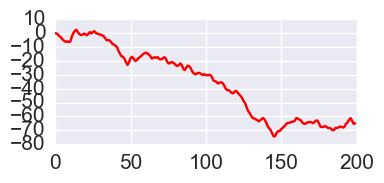

In [34]:
pars = [0.3, 0.5]
sz   = 200
sdata, _ = armf.generateArma(pars, sz)

f,ax = plt.subplots(1,1,figsize=(4,2))
plt.plot(np.cumsum(sdata), color='r')
plt.tight_layout()

pars

In [35]:
armf = reload(armf)
%time llk, parsH, llkOptimal, optimalPars = armf.estimate_mpl_beta(sdata)

CPU times: user 1min 16s, sys: 337 ms, total: 1min 16s
Wall time: 1min 16s


In [36]:
optimalPars

array([ 0.26410256,  0.54064659])

In [37]:
fitDataWith3simpleEstimators(sdata)

(array([ 0.23482308,  0.58503466]),
 array([ 0.24358974,  0.57985471]),
 array([ 0.22876268,  0.59230769]))

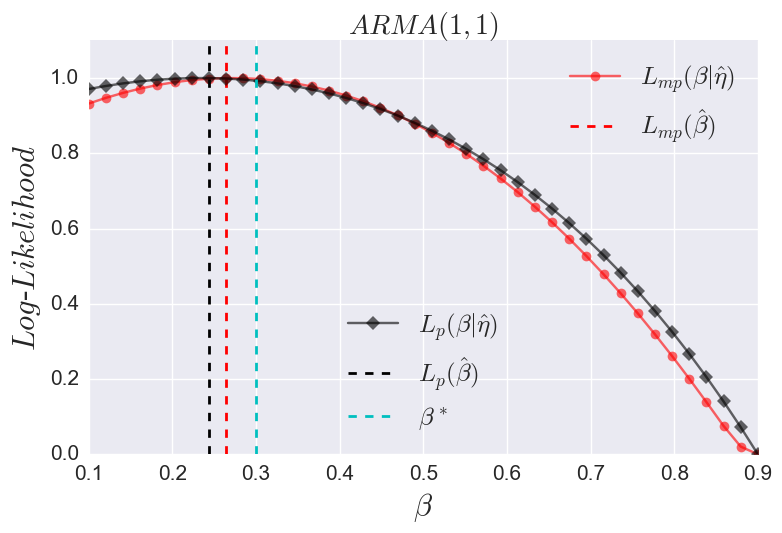

In [38]:
# Estimate using LP
aa,_,_,t = armf.profileARMA_estimator(sdata, beta=True)


# PLOT RES
(pf.normalize_data_for_comparacy(-llk, sklearn=True)).plot(color='r', marker='o',
                                                           alpha=0.6)
plt.axvline(optimalPars[0], color='r', linewidth=2, linestyle='--')
plt.legend([r'$L_{mp}(\beta|\hat{\eta})$',r'$L_{mp}(\hat{\beta})$'],fontsize=18, loc='best')
plt.ylabel(r'$Log$-$Likelihood$', fontsize=22)
plt.xlabel(r'$\beta$', fontsize=22)
plt.ylim([0., 1.1])
ax = plt.twinx()
(pf.normalize_data_for_comparacy(-aa, sklearn=True)).plot(ax=ax, color='k',
                                                         marker='D', alpha=0.6)
plt.axvline(t[0], color='k', linewidth=2, linestyle='--')
ax.axvline(pars[0], color='c', linewidth=2, linestyle='--')
plt.legend([r'$L_{p}(\beta|\hat{\eta})$',r'$L_{p}(\hat{\beta})$',r'$\beta^*$'],fontsize=18,
           loc='lower center')
ax.set_yticks([])
plt.title(r'$ARMA(1,1)$', fontsize=20)
ax.set_ylim([0., 1.1])
plt.tight_layout()
#plt.savefig('/Users/demos/Desktop/ARMA1MPL.pdf')

# Theta MPL 

CPU times: user 1min 25s, sys: 432 ms, total: 1min 25s
Wall time: 1min 26s


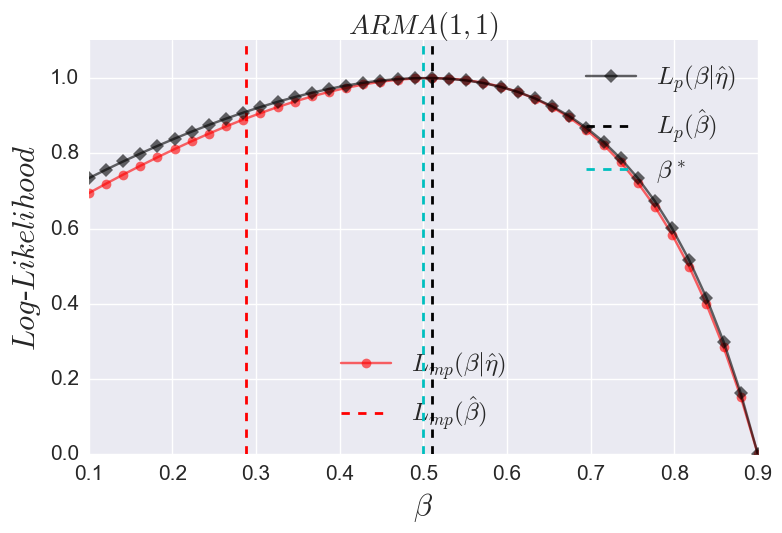

In [31]:
armf = reload(armf)
%time llk, parsH, llkOptimal, optimalPars = armf.estimate_mpl_theta(sdata)

# Estimate using LP
aa,_,_,t = armf.profileARMA_estimator(sdata, beta=False)

# PLOT RES
(pf.normalize_data_for_comparacy(-llk, sklearn=True)).plot(color='r', marker='o',
                                                           alpha=0.6)
plt.axvline(optimalPars[0], color='r', linewidth=2, linestyle='--')
plt.legend([r'$L_{mp}(\beta|\hat{\eta})$',r'$L_{mp}(\hat{\beta})$'],fontsize=18, loc='best')
plt.ylabel(r'$Log$-$Likelihood$', fontsize=22)
plt.xlabel(r'$\beta$', fontsize=22)
plt.ylim([0., 1.1])
ax = plt.twinx()
(pf.normalize_data_for_comparacy(-aa, sklearn=True)).plot(ax=ax, color='k',
                                                         marker='D', alpha=0.6)
plt.axvline(t[1], color='k', linewidth=2, linestyle='--')
ax.axvline(pars[1], color='c', linewidth=2, linestyle='--')
plt.legend([r'$L_{p}(\beta|\hat{\eta})$',r'$L_{p}(\hat{\beta})$',r'$\beta^*$'],fontsize=18,
           loc='upper right')
ax.set_yticks([])
plt.title(r'$ARMA(1,1)$', fontsize=20)
ax.set_ylim([0., 1.1])
plt.tight_layout()
#plt.savefig('/Users/demos/Desktop/ARMA1MPL.pdf')

# Run simulations
- Re-write codes exactly the same: LP and MPL monte-carlo
- ja adicionei os estimadore na funcao. Agora falta organizar a computacao da metrica

In [32]:
from tqdm import tqdm

In [33]:
tqdm(armf.estimate_mpl_theta(sdata))



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]